Using TensorFlow backend.


<IPython.core.display.Javascript object>


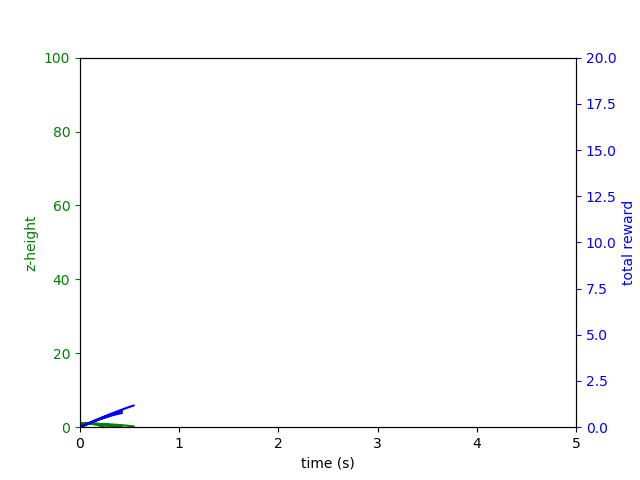

Episode =    0, total reward =   1.275 (best =    -inf), noise_scale = 0.1
Episode =   10, total reward =   1.002 (best =   0.142), noise_scale = 0.1
Episode =   20, total reward =   0.949 (best =   0.142), noise_scale = 0.1
Episode =   30, total reward =   0.592 (best =   0.142), noise_scale = 0.1
Episode =   40, total reward =   0.992 (best =   0.143), noise_scale = 0.1
Episode =   50, total reward =   0.685 (best =   0.143), noise_scale = 0.1
Episode =   60, total reward =   0.794 (best =   0.143), noise_scale = 0.1
Episode =   70, total reward =   0.824 (best =   0.143), noise_scale = 0.1
Episode =   80, total reward =   0.788 (best =   0.143), noise_scale = 0.1


In [ ]:
import numpy as np
from agents.agent import Agent
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

num_episodes = 250                             # number of episodes
init_pose = np.array([0., 0., 1., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

task = Task(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities)
agent = Agent(task)

display_graph = True
display_freq = 10

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries. y1 = z, y2 = reward
time_limit = 5
y1_lower = 0
y1_upper = 100
y2_lower = 0
y2_upper = 20

sub1.set_xlim(0, time_limit)  # this is typically time
sub1.set_ylim(y1_lower, y1_upper)  # limits to your y1
sub2.set_xlim(0, time_limit)  # time, again
sub2.set_ylim(y2_lower, y2_upper)  # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.tick_params(axis='x', colors='k')

sub1.set_ylabel('z-height', color='g')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('total reward', color='b') 
sub2.tick_params(axis='y', colors='b')

for episode in range(num_episodes + 1):
    state = agent.reset_episode()
    done = False
    
    x, y1, y2 = [], [], []
    
    while done is False:
        
        if (episode % display_freq == 0) and (display_graph is True):
            x.append(task.sim.time) # x: time
            y1.append(task.sim.pose[2]) # y1: z-height
            y2.append(agent.total_reward) #y2: score
        
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
    if (episode % display_freq == 0) and (display_graph is True):
        plt_dynamic(x, y1, y2)
        
        print("Episode = {:4d}, total reward = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
            episode, agent.total_reward, agent.best_score, agent.noise_scale))
